In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [3]:
nocoff_means, coff_means, diffs = [],[],[]

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    #append
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)

In [5]:
print(np.std(nocoff_means))
print(np.std(coff_means))
print(np.std(diffs))

0.4051012837953605
0.2407402135644629
0.46978174056315813


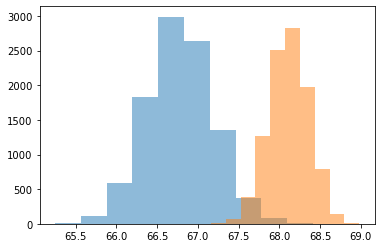

In [6]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5);

(array([  24.,  109.,  546., 1516., 2623., 2826., 1664.,  568.,  106.,
          18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <BarContainer object of 10 artists>)

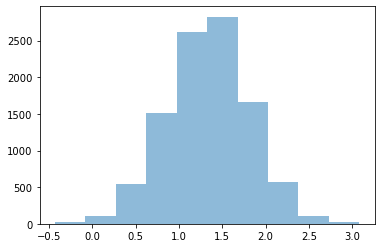

In [8]:
plt.hist(diffs, alpha = 0.5)

In [15]:
null_vals = np.random.normal(70, np.std(diffs), 1000)

(array([  1.,   4.,  30.,  93., 144., 273., 251., 141.,  49.,  14.]),
 array([68.1807377 , 68.49549975, 68.81026179, 69.12502384, 69.43978588,
        69.75454793, 70.06930997, 70.38407201, 70.69883406, 71.0135961 ,
        71.32835815]),
 <BarContainer object of 10 artists>)

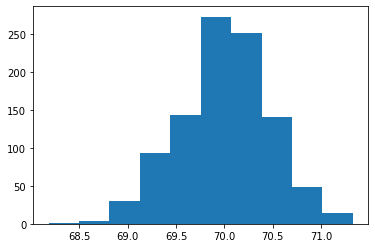

In [16]:
plt.hist(null_vals)

In [17]:
sample_mean = sample_data.height.mean()

In [18]:
(null_vals > sample_mean).mean()

1.0

In [19]:
(null_vals < sample_mean).mean()

0.0

In [22]:
null_mean = 70

(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0